<a href="https://colab.research.google.com/github/nancykaim/TESTLINE_ASSIGNMENT_NANCYKAIM/blob/main/ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***TITLE AND OVERVIEW***


### Title & Overview Section 💻✨

---

### **Title**  
🎯 **Personalized Student Recommendations for NEET Testline** 🎯  

---

### **Overview**  🎀

- **Objective**:  
  Develop a Python-based solution to analyze quiz performance and provide personalized recommendations to help students improve their preparation for NEET.

- **Key Features**:  
  - Fetch and analyze real-time **quiz performance data** from an API.
  - Identify **weak areas**, track improvement trends, and highlight performance gaps for individual users.
  - Generate **personalized recommendations** based on topic-wise scores, difficulty levels, and response accuracy.

- **Technical Highlights**:  
  - Use **pandas** for data analysis and **matplotlib/seaborn** for visualizing performance trends.
  - Fetch live data from **JSONServe API** and process it into actionable insights.
  - Ensure **clear and intuitive output**, including visualizations and improvement plans.

- **Outcome**:  
  Provide students with actionable feedback to improve their preparation by focusing on weak topics, question types, and difficulty levels. This solution aligns with **AI-driven educational assistance goals**.

---



# ***IMPORT AND SETUP***

In [ ]:
# Basic imports
import pandas as pd
import numpy as np
import requests
import json
from datetime import datetime
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For handling warnings (optional, just to keep the notebook clean)
import warnings
warnings.filterwarnings("ignore")

#api setup
quizapi = "https://www.jsonkeeper.com/b/LLQT"
quizsubmittionapi = "https://api.jsonserve.com/rJvd7g"
historyapi = "https://api.jsonserve.com/XgAgFJ"

# ***DATA FETCHING***

In [ ]:
def fetch_data(api_url):
    try:
        response = requests.get(api_url)
        response.raise_for_status()  # Checking for HTTP request errors
        print(f"Data fetched successfully from {api_url}")
        return response.json()  # Return our data as a Python dictionary
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch data from {api_url}: {e}")
        return None


# ***HISTORICAL DATA ANALYSIS***

In [ ]:
#function

def time_diff_calc(start,end):
  format = "%H:%M:%S"
  s = datetime.strptime(start, format)
  e = datetime.strptime(end, format)
  diff = e-s
  return diff.seconds / 60



Cleaning data

In [ ]:
histdata = fetch_data(historyapi)
students_df = pd.DataFrame(histdata)
students_df = students_df.drop(columns=['response_map', 'quiz'])

# Creating the Quiz DataFrame
quiz_data = [
    {**record['quiz']} for record in histdata
]
quiz_df = pd.DataFrame(quiz_data)

students_df['type'] = quiz_df['topic']
students_df["time_taken"] = ""

for t in range(len(students_df)):
  start = students_df["started_at"][t]
  end = students_df["ended_at"][t]
  timediff = time_diff_calc(start[11:18], end[11:18])
  students_df["time_taken"][t] = timediff

students_df["rank_text"] = students_df["rank_text"].apply(lambda strx: strx.strip("Topic Rank- #-"))
students_df["accuracy"] = students_df["accuracy"].apply(lambda strx: int(strx.rstrip("% ")))
students_df['submitted_at'] = pd.to_datetime(students_df['submitted_at']).dt.tz_localize(None)
students_df['final_score'] = students_df['final_score'].apply(lambda x: float(x.rstrip("%")))
students_df = students_df.drop(columns=['created_at','updated_at','started_at','ended_at','duration'])
quiz_df = quiz_df[['id', 'title', 'topic', 'duration', 'questions_count', 'daily_date',
       'max_mistake_count']]


Data fetched successfully from https://api.jsonserve.com/XgAgFJ


In [ ]:
students_df.head(14)

,id,quiz_id,user_id,submitted_at,score,trophy_level,accuracy,speed,final_score,negative_score,correct_answers,incorrect_answers,source,type,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,time_taken
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:30:18.027,108,2,90,100,105.0,3.0,27,3,exam,Body Fluids and Circulation,107,100,171,9,12,11.966667
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:17:44.042,92,1,100,100,92.0,0.0,23,0,exam,Body Fluids and Circulation,395,23,9140,3,3,10.0
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16 20:13:19.682,116,2,96,100,115.0,1.0,29,1,live,Body Fluids and Circulation,115,100,418,11,12,12.0
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16 20:00:11.562,36,2,90,100,35.0,1.0,9,1,live,Body Fluids and Circulation,152,23,1598,1,2,7.916667
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15 20:34:39.462,36,3,31,96,16.0,20.0,9,20,exam,Body Fluids and Circulation,35,100,2023,0,20,13.016667
5,328488,57,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15 15:57:12.791,40,3,38,86,24.0,16.0,10,16,exam,Human Reproduction,43,89,1810,0,16,10.016667
6,328414,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15 15:36:46.410,36,3,50,78,27.0,9.0,9,9,exam,Body Fluids and Circulation,152,23,1598,0,9,13.0
7,321514,20,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13 16:10:03.743,12,2,30,100,5.0,7.0,3,7,live,principles of inheritance and variation,18,59,2556,0,7,4.966667
8,320963,24,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13 13:28:12.784,76,2,100,95,76.0,0.0,19,0,live,microbes in human welfare,375,20,8479,4,4,14.0
9,320916,18,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13 13:12:40.687,40,1,100,100,40.0,0.0,10,0,live,reproductive health,177,22,2380,0,0,1.033333


In [ ]:
quiz_df.head(100)

,id,title,topic,duration,questions_count,daily_date,max_mistake_count
0,51,Human Physiology (15),Body Fluids and Circulation,100,100,"January 17, 2025",15
1,6,Human Physiology PYQ,Body Fluids and Circulation,23,23,"January 17, 2025",15
2,51,Human Physiology (15),Body Fluids and Circulation,100,100,"January 17, 2025",15
3,6,Human Physiology PYQ,Body Fluids and Circulation,23,23,"January 17, 2025",15
4,51,Human Physiology (15),Body Fluids and Circulation,100,100,"January 17, 2025",15
5,57,Reproduction,Human Reproduction,89,89,"January 17, 2025",15
6,6,Human Physiology PYQ,Body Fluids and Circulation,23,23,"January 17, 2025",15
7,20,PRINCIPLES OF INHERITANCE AND VARIATION PYQ,principles of inheritance and variation,59,59,"January 17, 2025",15
8,24,MICROBES IN HUMAN WELFARE PYQ,microbes in human welfare,20,20,"January 17, 2025",15
9,18,REPRODUCTIVE HEALTH PYQ,reproductive health,22,22,"January 17, 2025",15


# ***TASK 1) ANALYSIS THE DATA***

**MERGING DATA**

In [ ]:
merged_df = pd.merge(students_df, quiz_df[['id', 'topic']], left_on='quiz_id', right_on='id', how='left')
merged_df = merged_df.drop_duplicates()
merged_df.reset_index(drop=True, inplace=True)
merged_df['topic'] = merged_df['topic'].apply(lambda x: x.strip())
merged_df['topic'] = merged_df['topic'].replace('reproductive health', 'Reproductive Health')
merged_df.head()

,id_x,quiz_id,user_id,submitted_at,score,trophy_level,accuracy,speed,final_score,negative_score,...,source,type,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,time_taken,id_y,topic
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:30:18.027,108,2,90,100,105.0,3.0,...,exam,Body Fluids and Circulation,107,100,171,9,12,11.966667,51,Body Fluids and Circulation
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:17:44.042,92,1,100,100,92.0,0.0,...,exam,Body Fluids and Circulation,395,23,9140,3,3,10.0,6,Body Fluids and Circulation
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16 20:13:19.682,116,2,96,100,115.0,1.0,...,live,Body Fluids and Circulation,115,100,418,11,12,12.0,51,Body Fluids and Circulation
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16 20:00:11.562,36,2,90,100,35.0,1.0,...,live,Body Fluids and Circulation,152,23,1598,1,2,7.916667,6,Body Fluids and Circulation
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15 20:34:39.462,36,3,31,96,16.0,20.0,...,exam,Body Fluids and Circulation,35,100,2023,0,20,13.016667,51,Body Fluids and Circulation


-> How total time taken by student to solve the paper effected the marks

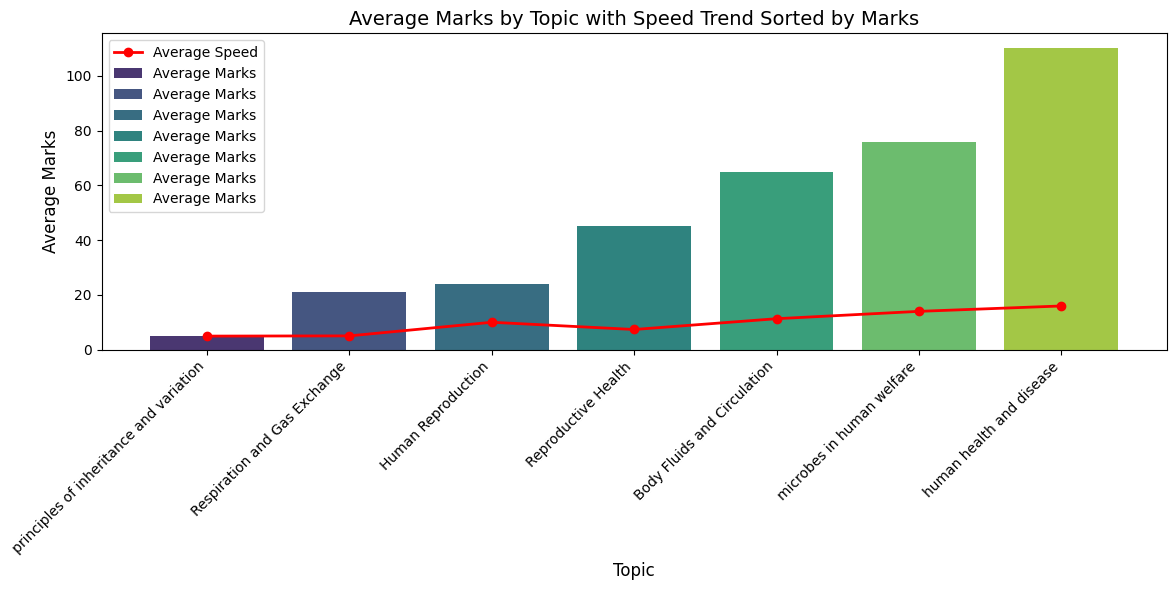

,topic,avg_score,avg_time_taken
6,principles of inheritance and variation,5.000000,4.966667
3,Respiration and Gas Exchange,21.000000,5.05
1,Human Reproduction,24.000000,10.016667
2,Reproductive Health,45.333333,7.377778
0,Body Fluids and Circulation,65.000000,11.316667
5,microbes in human welfare,76.000000,14.0
4,human health and disease,110.000000,15.966667


In [ ]:


# Selecting relevant columns
topic_performance = merged_df[['final_score', 'time_taken', 'topic']]

# Grouping by 'topic' and calculate the average of 'final_score' and 'time_taken'
topic_performance_grouped = topic_performance.groupby('topic').agg(
    avg_score=('final_score', 'mean'),
    avg_time_taken=('time_taken', 'mean')
).reset_index()

# Sorting values by 'avg_score' to ensure low marks come first
topic_performance_grouped = topic_performance_grouped.sort_values(by='avg_score')


plt.figure(figsize=(12, 6))

# Bar plot for average final score
sns.barplot(data=topic_performance_grouped, x='topic', y='avg_score', palette='viridis', label='Average Marks')

# Line plot for average time taken (speed)
plt.plot(topic_performance_grouped['topic'], topic_performance_grouped['avg_time_taken'], color='red', marker='o', label='Average Speed', linewidth=2)

plt.xlabel("Topic", fontsize=12)
plt.ylabel("Average Marks", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.title("Average Marks by Topic with Speed Trend Sorted by Marks", fontsize=14)
plt.legend(loc='upper left', fontsize=10)


plt.tight_layout()
plt.show()
topic_performance_grouped


-> Students' performance across topics, comparing mistakes, corrections, correct answers, and quiz sizes.

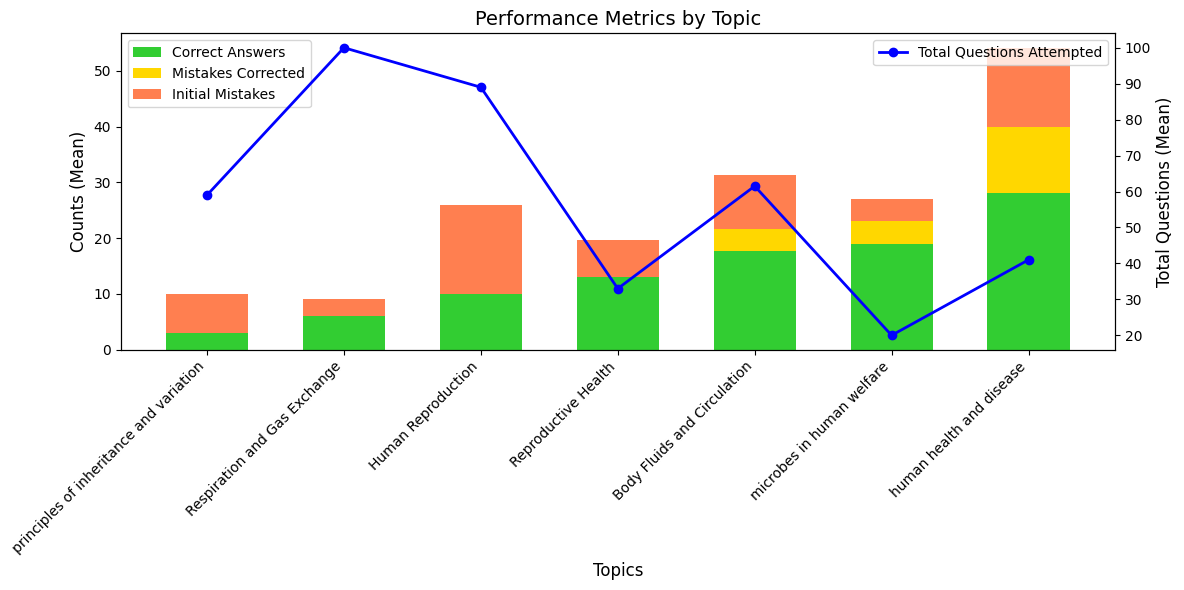

,topic,mistakes_corrected,initial_mistake_count,total_questions,correct_answers
6,principles of inheritance and variation,0.0,7.000000,59.0,3.000000
3,Respiration and Gas Exchange,0.0,3.000000,100.0,6.000000
1,Human Reproduction,0.0,16.000000,89.0,10.000000
2,Reproductive Health,0.0,6.666667,33.0,13.000000
0,Body Fluids and Circulation,4.0,9.666667,61.5,17.666667
5,microbes in human welfare,4.0,4.000000,20.0,19.000000
4,human health and disease,12.0,14.000000,41.0,28.000000


In [ ]:
df2 = merged_df[['topic',
                 'mistakes_corrected'	,
                 'initial_mistake_count',
                 'total_questions',
                 'correct_answers']]
answer_perf = df2.groupby('topic').agg({'mistakes_corrected':'mean','initial_mistake_count':'mean','total_questions':'mean','correct_answers':'mean'}).reset_index()
answer_perf = answer_perf.sort_values(by='correct_answers')
# Data preparation
x = np.arange(len(answer_perf['topic']))  # Number of topics
bar_width = 0.6

# Plot setup
fig, ax1 = plt.subplots(figsize=(12, 6))

# Stacked bar chart
p1 = ax1.bar(x, answer_perf['correct_answers'], bar_width, label='Correct Answers', color='limegreen')
p2 = ax1.bar(x, answer_perf['mistakes_corrected'], bar_width, bottom=answer_perf['correct_answers'], label='Mistakes Corrected', color='gold')
p3 = ax1.bar(x, answer_perf['initial_mistake_count'], bar_width, bottom=answer_perf['correct_answers'] + answer_perf['mistakes_corrected'], label='Initial Mistakes', color='coral')

# Customize the bar chart
ax1.set_xlabel("Topics", fontsize=12)
ax1.set_ylabel("Counts (Mean)", fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(answer_perf['topic'], rotation=45, ha='right')
ax1.legend(loc="upper left")
ax1.set_title("Performance Metrics by Topic", fontsize=14)

# Line plot for total questions
ax2 = ax1.twinx()
ax2.plot(x, answer_perf['total_questions'], color="blue", marker="o", label="Total Questions Attempted", linewidth=2)
ax2.set_ylabel("Total Questions (Mean)", fontsize=12)
ax2.legend(loc="upper right")

# Final layout
fig.tight_layout()
plt.show()
answer_perf


->Comparing the accuracy of students across different topics between two sources: Live and Exam. The bar lengths represent accuracy values, with separate bars for each source, allowing for an easy visual comparison of performance.

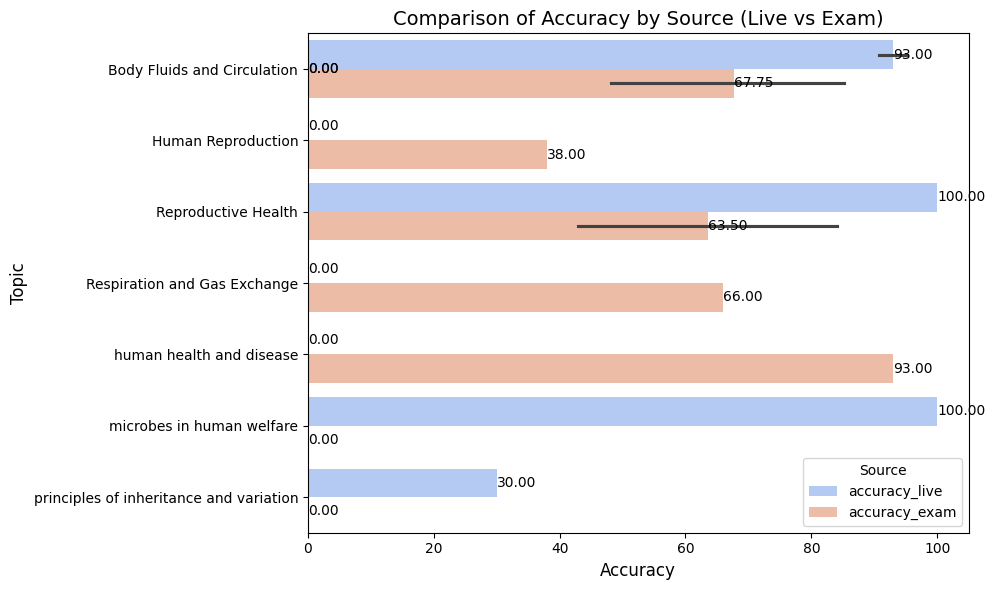

,topic,Source,Accuracy
0,Body Fluids and Circulation,accuracy_live,96.0
1,Body Fluids and Circulation,accuracy_live,96.0
2,Body Fluids and Circulation,accuracy_live,96.0
3,Body Fluids and Circulation,accuracy_live,96.0
4,Body Fluids and Circulation,accuracy_live,90.0
5,Body Fluids and Circulation,accuracy_live,90.0
6,Body Fluids and Circulation,accuracy_live,90.0
7,Body Fluids and Circulation,accuracy_live,90.0
8,Human Reproduction,accuracy_live,0.0
9,Reproductive Health,accuracy_live,100.0


In [ ]:
live_source = merged_df[merged_df['source']=='live'].copy()
exam_source = merged_df[merged_df['source']=='exam'].copy()

df3 = pd.merge(live_source[['topic','accuracy']],
               exam_source[['topic','accuracy']],
               on='topic',
               how='outer',
               suffixes=('_live', '_exam'))
df3.fillna(0, inplace=True)

df3_melted = df3.melt(id_vars="topic", value_vars=["accuracy_live", "accuracy_exam"],
                      var_name="Source", value_name="Accuracy")

plt.figure(figsize=(10, 6))

sns.barplot(data=df3_melted, x="Accuracy", y="topic", hue="Source", palette="coolwarm", linewidth=0)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width():.2f}',
                       (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                       ha='left', va='center', color='black', fontsize=10)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Topic', fontsize=12)
plt.title('Comparison of Accuracy by Source (Live vs Exam)', fontsize=14)
plt.tight_layout()
plt.show()

df3_melted

-> Comparing the score and time taken between the first and last attempts for repeated exams, highlighting performance improvement and efficiency.

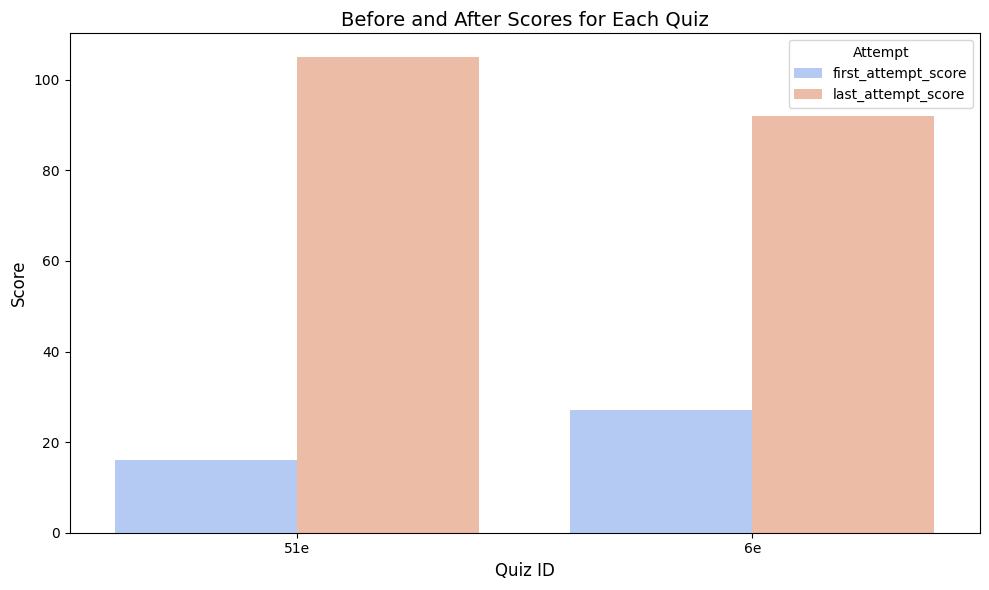

,quiz_id,first_attempt_date,last_attempt_date,first_attempt_score,last_attempt_score,first_attempt_time,last_attempt_time,score_diff,time_diff
0,51e,2025-01-15 20:34:39.462,2025-01-17 15:30:18.027,16.0,105.0,13.016667,11.966667,89.0,-1.05
1,6e,2025-01-15 15:36:46.410,2025-01-17 15:17:44.042,27.0,92.0,13.000000,10.000000,65.0,-3.00


In [ ]:
df4 =  students_df.groupby(['quiz_id']).filter(lambda x: len(x) > 1)
df4 = df4[['type','quiz_id','submitted_at','final_score','time_taken','source']]
for i in df4.index:
  if df4.loc[i, 'source']=='exam':
    df4.loc[i, 'quiz_id'] = str(df4.loc[i, 'quiz_id']) + 'e'
  else:
    df4.loc[i, 'quiz_id'] = str(df4.loc[i, 'quiz_id']) + 'l'

df4 = df4.sort_values(['submitted_at', 'submitted_at'])
exam_improv = []

for quiz_id, group in df4.groupby('quiz_id'):
    if len(group)>1:
      sorted_attempt = group.sort_values('submitted_at')

      first_attempt = sorted_attempt.iloc[0]
      last_attempt = sorted_attempt.iloc[-1]

      improve={
          'quiz_id':quiz_id,
          'first_attempt_date' : first_attempt['submitted_at'],
          'last_attempt_date' : last_attempt['submitted_at'],
          'first_attempt_score' : first_attempt['final_score'],
          'last_attempt_score' : last_attempt['final_score'],
          'first_attempt_time' : first_attempt['time_taken'],
          'last_attempt_time' : last_attempt['time_taken'],
          'score_diff' : last_attempt['final_score'] - first_attempt['final_score'],
          'time_diff' : last_attempt['time_taken'] - first_attempt['time_taken']
      }

      exam_improv.append(improve)

exam_improv_df = pd.DataFrame(exam_improv)

score_improv_meltd_df = exam_improv_df.melt(id_vars="quiz_id",
                    value_vars=["first_attempt_score", "last_attempt_score"],
                    var_name="Attempt",
                    value_name="Score")
plt.figure(figsize=(10, 6))
sns.barplot(x='quiz_id', y='Score', hue='Attempt', data=score_improv_meltd_df, palette='coolwarm')


plt.title('Before and After Scores for Each Quiz', fontsize=14)
plt.xlabel('Quiz ID', fontsize=12)
plt.ylabel('Score', fontsize=12)


plt.tight_layout()
plt.show()
exam_improv_df

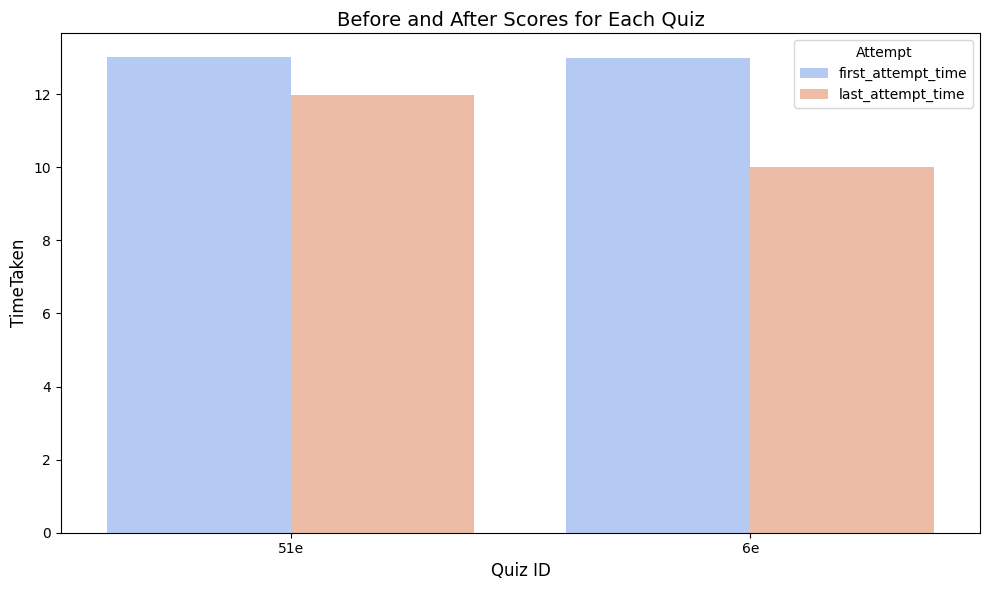

In [ ]:
time_improv_meltd_df = exam_improv_df.melt(id_vars="quiz_id",
                    value_vars=["first_attempt_time", "last_attempt_time"],
                    var_name="Attempt",
                    value_name="TimeTaken")
plt.figure(figsize=(10, 6))
sns.barplot(x='quiz_id', y='TimeTaken', hue='Attempt', data=time_improv_meltd_df, palette='coolwarm')

plt.title('Before and After Scores for Each Quiz', fontsize=14)
plt.xlabel('Quiz ID', fontsize=12)
plt.ylabel('TimeTaken', fontsize=12)

plt.tight_layout()
plt.show()


# ***TASK 2 & 3) GENERATE INSIGHTS & RECOMMENDATION GENERATION***

Low Scores Across Topics

In [ ]:
weak_areas_scores = topic_performance_grouped[topic_performance_grouped['avg_score'] < 40]
print("Weak Areas Based on Low Scores:")
weak_areas_scores

Weak Areas Based on Low Scores:


,topic,avg_score,avg_time_taken
6,principles of inheritance and variation,5.0,4.966667
3,Respiration and Gas Exchange,21.0,5.05
1,Human Reproduction,24.0,10.016667


High Time Taken with Low Accuracy

In [ ]:
weak_areas_time_score = topic_performance_grouped[(topic_performance_grouped['avg_time_taken'] > topic_performance_grouped['avg_time_taken'].mean()) &
                                                  (topic_performance_grouped['avg_score'] < 40)]
print("Weak Areas Based on Time and Score:")
weak_areas_time_score

Weak Areas Based on Time and Score:


,topic,avg_score,avg_time_taken
1,Human Reproduction,24.0,10.016667


High Mistakes in Specific Topics

In [ ]:
weak_areas_mistakes = answer_perf[answer_perf['mistakes_corrected'] > 3]  # Arbitrary threshold for mistakes corrected
print("Weak Areas Based on Mistakes Corrected:")
weak_areas_mistakes

Weak Areas Based on Mistakes Corrected:


,topic,mistakes_corrected,initial_mistake_count,total_questions,correct_answers
0,Body Fluids and Circulation,4.0,9.666667,61.5,17.666667
5,microbes in human welfare,4.0,4.000000,20.0,19.000000
4,human health and disease,12.0,14.000000,41.0,28.000000


Significant Score Improvements Over Time

In [ ]:
improvement_trends = exam_improv_df[exam_improv_df['score_diff'] > 50]
print("Topics with Significant Score Improvements:")
improvement_trends

Topics with Significant Score Improvements:


,quiz_id,first_attempt_date,last_attempt_date,first_attempt_score,last_attempt_score,first_attempt_time,last_attempt_time,score_diff,time_diff
0,51e,2025-01-15 20:34:39.462,2025-01-17 15:30:18.027,16.0,105.0,13.016667,11.966667,89.0,-1.05
1,6e,2025-01-15 15:36:46.410,2025-01-17 15:17:44.042,27.0,92.0,13.000000,10.000000,65.0,-3.00


Improvement in Time Taken

In [ ]:
time_improvement_trends = exam_improv_df[exam_improv_df['time_diff'] < -2]  # Arbitrary threshold for time improvement
print("Improvement in Time Taken:")
time_improvement_trends

Improvement in Time Taken:


,quiz_id,first_attempt_date,last_attempt_date,first_attempt_score,last_attempt_score,first_attempt_time,last_attempt_time,score_diff,time_diff
1,6e,2025-01-15 15:36:46.410,2025-01-17 15:17:44.042,27.0,92.0,13.0,10.0,65.0,-3.0


Higher Accuracy on Later Attempts

In [ ]:
accuracy_improvement = df3_melted.groupby('topic').apply(lambda x: x[x['Source'] == 'accuracy_exam']['Accuracy'].mean() >
                                                         x[x['Source'] == 'accuracy_live']['Accuracy'].mean())
print("Accuracy Improvement:")
accuracy_improvement

Accuracy Improvement:


,0
topic,
Body Fluids and Circulation,False
Human Reproduction,True
Reproductive Health,False
Respiration and Gas Exchange,True
human health and disease,True
microbes in human welfare,False
principles of inheritance and variation,False


Exam vs Live Accuracy Gaps

In [ ]:
performance_gap = df3_melted.groupby('topic').apply(lambda x: x[x['Source'] == 'accuracy_live']['Accuracy'].mean() -
                                                       x[x['Source'] == 'accuracy_exam']['Accuracy'].mean()).reset_index(name='gap')

performance_gap_topics = performance_gap[performance_gap['gap'] > 20]
print("Performance Gaps Between Live and Exam Accuracy:")
performance_gap_topics

Performance Gaps Between Live and Exam Accuracy:


,topic,gap
0,Body Fluids and Circulation,25.25
2,Reproductive Health,36.50
5,microbes in human welfare,100.00
6,principles of inheritance and variation,30.00


Areas Where Initial Performance Was Strong, but Declined

In [ ]:
score_decline = exam_improv_df[exam_improv_df['score_diff'] < 0]
print("Topics with Declined Scores:")
score_decline

Topics with Declined Scores:


,quiz_id,first_attempt_date,last_attempt_date,first_attempt_score,last_attempt_score,first_attempt_time,last_attempt_time,score_diff,time_diff


Low Correct Answers Despite High Questions Attempted

In [ ]:
performance_gap_low_correct = answer_perf[answer_perf['total_questions'] > 50 & (answer_perf['correct_answers'] < 10)]
print("Topics with Low Correct Answers Despite High Attempts:")
performance_gap_low_correct

Topics with Low Correct Answers Despite High Attempts:


,topic,mistakes_corrected,initial_mistake_count,total_questions,correct_answers
6,principles of inheritance and variation,0.0,7.000000,59.0,3.000000
3,Respiration and Gas Exchange,0.0,3.000000,100.0,6.000000
1,Human Reproduction,0.0,16.000000,89.0,10.000000
2,Reproductive Health,0.0,6.666667,33.0,13.000000
0,Body Fluids and Circulation,4.0,9.666667,61.5,17.666667
5,microbes in human welfare,4.0,4.000000,20.0,19.000000
4,human health and disease,12.0,14.000000,41.0,28.000000


Topic-wise Performance Comparison

In [ ]:
score_comparison = exam_improv_df[['quiz_id', 'first_attempt_score', 'last_attempt_score']]
score_comparison['score_diff'] = score_comparison['last_attempt_score'] - score_comparison['first_attempt_score']
print("First vs Last Attempt Scores:")
score_comparison

First vs Last Attempt Scores:


,quiz_id,first_attempt_score,last_attempt_score,score_diff
0,51e,16.0,105.0,89.0
1,6e,27.0,92.0,65.0


Suggested Focus Areas Based on Low Scores

In [ ]:
suggested_focus_areas = weak_areas_scores[['topic', 'avg_score']]
print("Suggested Focus Areas:")
suggested_focus_areas

Suggested Focus Areas:


,topic,avg_score
6,principles of inheritance and variation,5.0
3,Respiration and Gas Exchange,21.0
1,Human Reproduction,24.0


Suggested Focus on Time Management

In [ ]:
time_management_suggestions = weak_areas_time_score[['topic', 'avg_time_taken']]
print("Suggested Time Management Focus Areas:")
time_management_suggestions

Suggested Time Management Focus Areas:


,topic,avg_time_taken
1,Human Reproduction,10.016667


 Recommendations for Exam Strategies

In [ ]:
exam_strategy_recommendations = performance_gap_topics[['topic', 'gap']]
print("Exam Strategy Recommendations:")
exam_strategy_recommendations

Exam Strategy Recommendations:


,topic,gap
0,Body Fluids and Circulation,25.25
2,Reproductive Health,36.50
5,microbes in human welfare,100.00
6,principles of inheritance and variation,30.00


# ***API/SCRIP EXPLANATION***

fecthing data from api url link

In [ ]:
from urllib.request import urlopen
import json

response = urlopen('https://api.openf1.org/v1/drivers')
data = json.loads(response.read().decode('utf-8'))
data[0]

{'driver_number': 1,
 'broadcast_name': 'M VERSTAPPEN',
 'full_name': 'Max VERSTAPPEN',
 'name_acronym': 'VER',
 'team_name': 'Red Bull Racing',
 'team_colour': '3671C6',
 'first_name': 'Max',
 'last_name': 'Verstappen',
 'headshot_url': 'https://www.formula1.com/content/dam/fom-website/drivers/M/MAXVER01_Max_Verstappen/maxver01.png.transform/1col/image.png',
 'country_code': 'NED',
 'session_key': 7763,
 'meeting_key': 1140}

function that take user input to fetch data using api

In [ ]:
def get_driver_info(driver_num):
  response = urlopen(f"https://api.openf1.org/v1/drivers?driver_number={driver_num}")
  if response.status == 404:
    return "Driver not found"
  elif response.status != 200:
    return "Error fetching data"
  else:
    data = json.loads(response.read().decode('utf-8'))
    return data[0]
driver_num = input("Enter Driver number: ")
get_driver_info(driver_num)

Enter Driver number: 44


{'driver_number': 44,
 'broadcast_name': 'L HAMILTON',
 'full_name': 'Lewis HAMILTON',
 'name_acronym': 'HAM',
 'team_name': 'Mercedes',
 'team_colour': '6CD3BF',
 'first_name': 'Lewis',
 'last_name': 'Hamilton',
 'headshot_url': 'https://www.formula1.com/content/dam/fom-website/drivers/L/LEWHAM01_Lewis_Hamilton/lewham01.png.transform/1col/image.png',
 'country_code': 'GBR',
 'session_key': 7763,
 'meeting_key': 1140}

In [ ]:
def get_weather_info(start,end):
  response = urlopen(f"https://api.openf1.org/v1/sessions?date_start>={start}&date_end<={end}")
  if response.status == 404:
    return "Driver not found"
  elif response.status != 200:
    return "Error fetching data"
  else:
    data = json.loads(response.read().decode('utf-8'))
    return data
startdate = input("Enter Start Date: ")
enddate = input("Enter End Date: ")


In [ ]:
def display_data():
  startdate = input("Enter Start Date: ")
  enddate = input("Enter End Date: ")
  data = get_weather_info(startdate,enddate) #could be replaced by any function
  if data:
    df = pd.DataFrame(data)
    print(df.columns)
    print(df.head())
  else:
    print("no data found sowwyy")


In [ ]:
display_data()